#### Using the decision tree algorithm for the classification on the iris data and regression on the cars dataset and plotting the decision tree using sklearn and matplot


In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import os

#For test train split
from sklearn.model_selection import train_test_split

#For fitting classification tree
from sklearn.tree import DecisionTreeClassifier

#For fitting regression tree
from sklearn.tree import DecisionTreeRegressor

#To create a confusion matrix
from sklearn.metrics import confusion_matrix

In [2]:
#Reading the data: 
iris = pd.read_csv("iris.csv")

# Seperating the target and the predictors

#declaring the variables x and y as predictors and terget variables
X = iris[['sepallength','sepalwidth','petallength','petalwidth']]
y = iris[['Species']]

#Splitting the data on train and validation of data
(X_train , X_test, y_train , y_test) = train_test_split(X,y,test_size=0.3,stratify=y, random_state = 100)

Test-Train (Stratified Sampling of Y)

In [3]:
#Splitting the data on train and validation of data
(X_train , X_test, y_train , y_test) = train_test_split(X,y,test_size=0.3,stratify=y, random_state = 100)

In [4]:
#Splitting the remaining data on train and test data
(X_train , X_valid, y_train , y_valid) = train_test_split(X_train,y_train,test_size=0.3,stratify=y_train, random_state = 100)

In [5]:
#Checks
#Proportion in the training data

y_train.Species.value_counts()/len(y_train)

versicolor    0.342466
virginica     0.328767
setosa        0.328767
Name: Species, dtype: float64

In [6]:
#Proportion in the testing data

y_train.Species.value_counts()/len(y_test)

versicolor    0.555556
virginica     0.533333
setosa        0.533333
Name: Species, dtype: float64

#### Decision tree classifier with criterion gini index

In [27]:
#Classifier based on gini and fitting the data
clf_gini = DecisionTreeClassifier(criterion = 'gini' , random_state =100,
                                 max_depth =3, min_samples_leaf =6)
clf_gini.fit(X_train , y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=100)

#### Classifying New Observations:

In [28]:
#Making Prediction
y_pred = clf_gini.predict(X_test)
y_pred

array(['setosa', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'virginica',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'setosa', 'versicolor', 'virginica'], dtype=object)

#### Confusion Martrix

In [29]:
#Calculating the confusion matrix
c= confusion_matrix(y_test , y_pred)
c

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  3, 12]], dtype=int64)

(+) -> setosa
(-) -> versicolor & virginica
1st row = 15 setosa are predicted correctly
2nd row = 15 versicolor are predicted correctly
1st row = 12 viginica are predicted correctly and 3 are misclassified to the class versicolor.

overall acc = (15+15+12)/N
sensitivity (recall) =15/SUM(CF[0,:])
specificity = (15+12)/ sum(CF[1,:] ,CF[2,:])
precision = 15/ sum(CF[:,0])



[Text(334.8, 453.0, 'X[2] <= 2.5\ngini = 0.667\nsamples = 73\nvalue = [24, 25, 24]'),
 Text(167.4, 271.8, 'gini = 0.0\nsamples = 24\nvalue = [24, 0, 0]'),
 Text(502.20000000000005, 271.8, 'X[3] <= 1.65\ngini = 0.5\nsamples = 49\nvalue = [0, 25, 24]'),
 Text(334.8, 90.59999999999997, 'gini = 0.08\nsamples = 24\nvalue = [0, 23, 1]'),
 Text(669.6, 90.59999999999997, 'gini = 0.147\nsamples = 25\nvalue = [0, 2, 23]')]

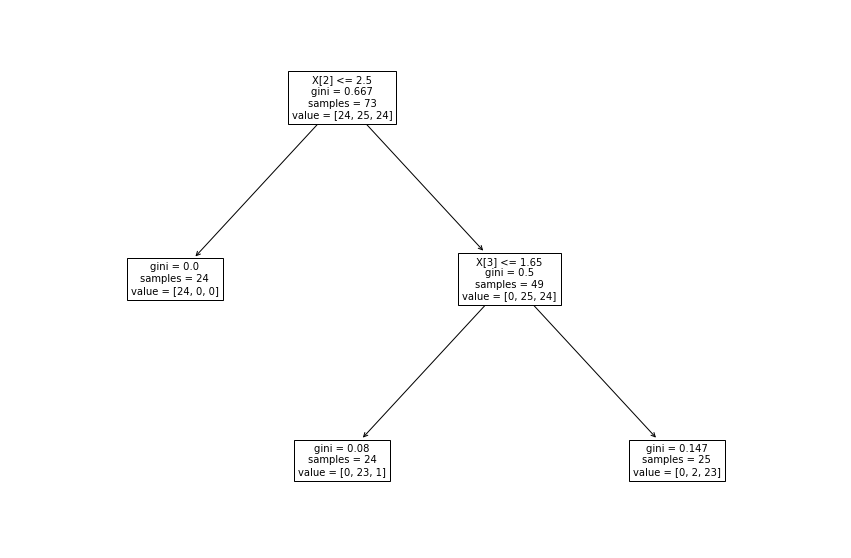

In [30]:
# Impoting the sk learn library to calculate the split of data and plot using matplotlib
from sklearn import tree
import matplotlib.pyplot as plt

#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
plt.figure(figsize=(15,10))
tree.plot_tree(clf_gini, filled=False,fontsize = 10)

### Regression Tree

In [30]:
#Importing and Reading the data: 
cars = pd.read_csv("cars.csv")

#declaring the variables x and y as predictors and terget variables
X = cars[['Cylinders', 'Weight', 'Horsepower']]
y = cars[['MPG']] 

#Splitting the data on train and test for prdictors and target
X_train , X_test, y_train , y_test = train_test_split ( X,y,test_size=0.3, random_state = 100)

#fitting the model on descion tree regressor
model = DecisionTreeRegressor(max_depth = 3,min_samples_leaf =5)
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)

In [31]:
# Preicting the models
y_pred = model.predict(X_test)
y_pred

array([19.2483871 , 32.89833333, 25.4452381 , 25.4452381 , 25.74545455,
       25.4452381 , 19.2483871 , 25.4452381 , 19.2483871 , 25.4452381 ,
       32.89833333, 11.7       , 11.7       , 32.89833333, 25.4452381 ,
       25.4452381 , 28.51071429, 19.2483871 , 25.74545455, 25.4452381 ,
       25.4452381 , 25.4452381 , 25.4452381 , 28.51071429, 19.2483871 ,
       15.12564103, 19.2483871 , 19.2483871 , 25.4452381 , 32.89833333,
       19.2483871 , 19.2483871 , 25.74545455, 32.89833333, 15.12564103,
       32.89833333, 19.2483871 , 25.4452381 , 19.2483871 , 11.7       ,
       25.74545455, 32.89833333, 19.2483871 , 19.2483871 , 32.89833333,
       25.4452381 , 15.12564103, 32.89833333, 25.4452381 , 19.2483871 ,
       32.89833333, 28.91111111, 25.74545455, 11.7       , 11.7       ,
       19.2483871 , 11.7       , 32.89833333, 19.2483871 , 15.12564103,
       19.2483871 , 19.2483871 , 32.89833333, 19.2483871 , 19.2483871 ,
       25.4452381 , 32.89833333, 32.89833333, 32.89833333, 32.89

In [32]:
#Calculating the Rmse of the regression model
np.sqrt(np.mean((np.array(y_test)-y_pred)**2))  #RMSE

10.255870838812472

[Text(418.5, 475.65000000000003, 'X[1] <= 2764.5\nmse = 77.321\nsamples = 284\nvalue = 23.076'),
 Text(209.25, 339.75, 'X[1] <= 2217.0\nmse = 40.042\nsamples = 139\nvalue = 29.504'),
 Text(104.625, 203.85000000000002, 'X[2] <= 79.0\nmse = 42.01\nsamples = 69\nvalue = 32.378'),
 Text(52.3125, 67.94999999999999, 'mse = 44.586\nsamples = 60\nvalue = 32.898'),
 Text(156.9375, 67.94999999999999, 'mse = 11.008\nsamples = 9\nvalue = 28.911'),
 Text(313.875, 203.85000000000002, 'X[2] <= 84.5\nmse = 21.935\nsamples = 70\nvalue = 26.671'),
 Text(261.5625, 67.94999999999999, 'mse = 23.027\nsamples = 28\nvalue = 28.511'),
 Text(366.1875, 67.94999999999999, 'mse = 17.448\nsamples = 42\nvalue = 25.445'),
 Text(627.75, 339.75, 'X[2] <= 129.5\nmse = 35.481\nsamples = 145\nvalue = 16.914'),
 Text(523.125, 203.85000000000002, 'X[2] <= 86.5\nmse = 29.936\nsamples = 73\nvalue = 20.227'),
 Text(470.8125, 67.94999999999999, 'mse = 45.739\nsamples = 11\nvalue = 25.745'),
 Text(575.4375, 67.94999999999999, 'm

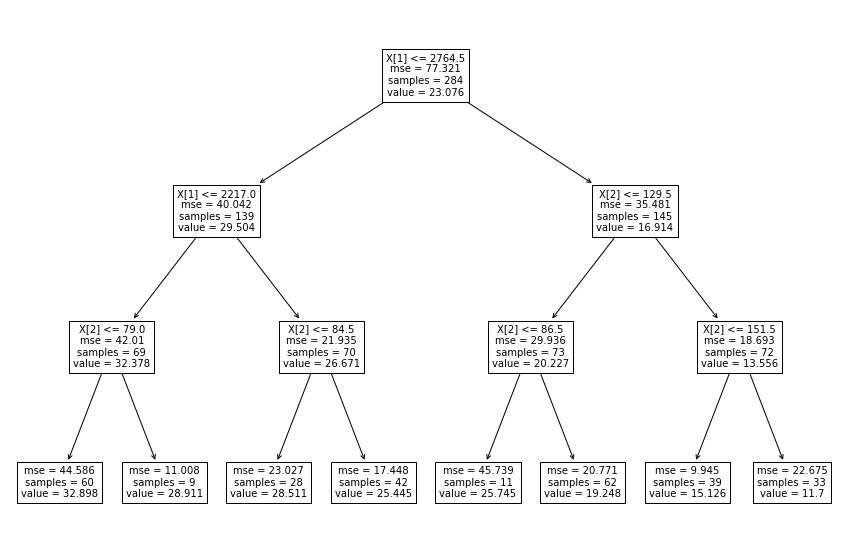

In [33]:
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,12), dpi=300)
plt.figure(figsize=(15,10))
tree.plot_tree(model, filled=False,fontsize = 10)

why do we need to use stratifies random sampling to split our data into train,test and validation for classification problem?